In [1]:
import numpy as np
import torch
from torch import nn
from game import *
from models import *

In [2]:
m = 'dnn'
if m == 'dnn':
    model = dnn_scorer()
    checkpoint = torch.load('lin_4999.pth')
    model.load_state_dict(checkpoint)
elif m == 'cnn':
    model = cnn_scorer()
    checkpoint = torch.load('cnn_99.pth')
    model.load_state_dict(checkpoint)

model.eval()

dnn_scorer(
  (d1): Linear(in_features=14, out_features=1, bias=False)
)

In [3]:
def Q_play(game,print_scores=False):
    moves = game.get_moves()
    scores = np.zeros(len(moves))
    for i in range(len(moves)):
        x = game.prepare_input(moves,i)
        scores[i] = model(x.unsqueeze(0)).item()
    if print_scores:
        print(scores)
    return moves[np.argmax(scores)]

def h_play(game):
    moves = game.get_moves()
    scores = np.zeros(len(moves))
    for i in range(len(moves)):
        scores[i] = game.try_score(moves[i])*game.turn
    return moves[np.argmax(scores)]

def r_play(game):
    moves = game.get_moves()
    return moves[np.random.choice(np.arange(len(moves)))]

def user_play(game):
    moves = game.get_moves()
    print(game.hands[(game.turn+1)//2])
    game.show_moves(moves)
    suc = False
    while not suc:
        try:
            x = int(input("Enter move you would like to play: "))
            suc = True
        except:
            print("Error Please enter a valid number!")
            pass
    return moves[x]

game_hist = list()
def comp_players(p1,p2,show_board=False):
    game = Sequence()
    i = 0
    while game.check_winner()==0:
        if i%2 == 0:
            move = p1(game)
            game.play(move)
        else:
            move = p2(game)
            game.play(move)
        i += 1
    if show_board:
        game.show_board()
    return game.check_winner()

In [4]:
from scipy.stats import norm

#run experiment comparing
def run_exp(n,p1,p2):
    rslts = np.zeros(n)
    for i in tqdm(range(n)):
        rslts[i] = comp_players(p1,p2)
        #print(rslts[i])
    rslts = (rslts+1)/2
    n = ((rslts==1).sum()+(rslts==0).sum())
    p = (rslts==1).sum()/n
    return n,p

def eq_test(p,n):
    z = (p-.5)/(.25/n)**0.5
    return z, norm.cdf(z)

## Compare Players

In [5]:
#power analysis
n = int(np.ceil((1.96/.05)**2*.25))
model.eval()
n,p = run_exp(n,Q_play,r_play)
z,p_val = eq_test(p,n)
p, z, p_val

100%|█████████████████████████████████████████████████████████████████████████████████| 385/385 [00:40<00:00,  9.50it/s]


(0.9402597402597402, 17.277039789735504, 1.0)

In [6]:
#power analysis
n = int(np.ceil((1.96/.075)**2*.25))
model.eval()
n,p = run_exp(n,Q_play,h_play)
z,p_val = eq_test(p,n)
p, z, p_val

100%|█████████████████████████████████████████████████████████████████████████████████| 171/171 [00:25<00:00,  6.73it/s]


(0.834319526627219, 8.692307692307693, 1.0)

In [7]:
#power analysis
n = int(np.ceil((1.96/.075)**2*.25))
model.eval()
n,p = run_exp(n,h_play,r_play)
z,p_val = eq_test(p,n)
p, z, p_val

100%|█████████████████████████████████████████████████████████████████████████████████| 171/171 [00:12<00:00, 13.47it/s]


(0.6686746987951807, 4.346442943955463, 0.9999930818489443)

## User vs. AI

[11 22  9 -2 12]


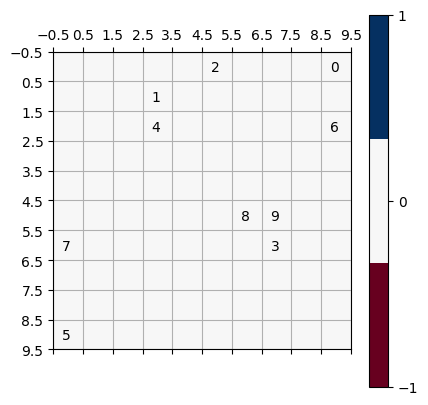

Enter move you would like to play:  5


[11 22 19 -2 12]


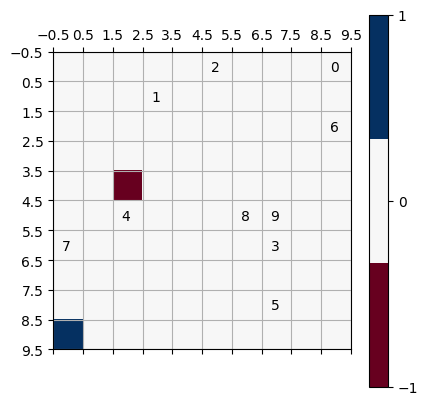

Enter move you would like to play:  9


[11 22 19 -2  7]


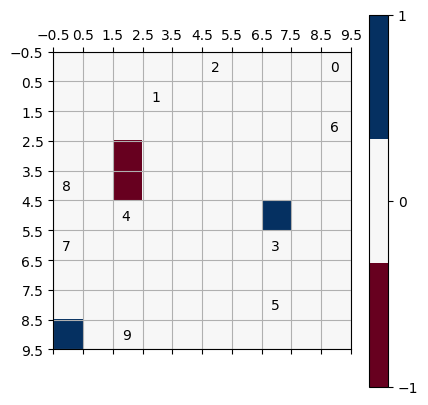

Enter move you would like to play:  3


[11 17 19 -2  7]


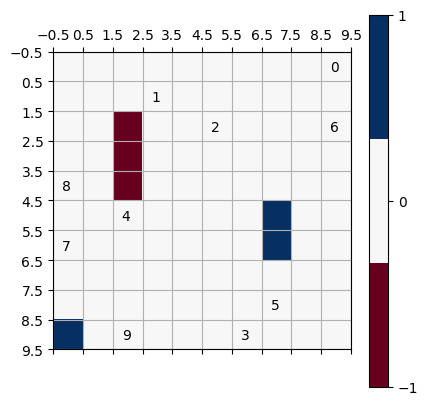

Enter move you would like to play:  5


[11 17  1 -2  7]


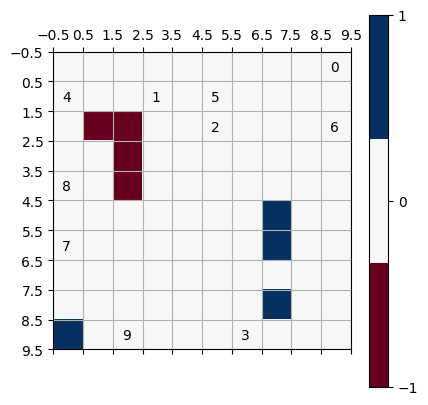

Enter move you would like to play:  9


[11 17  1 -2  3]


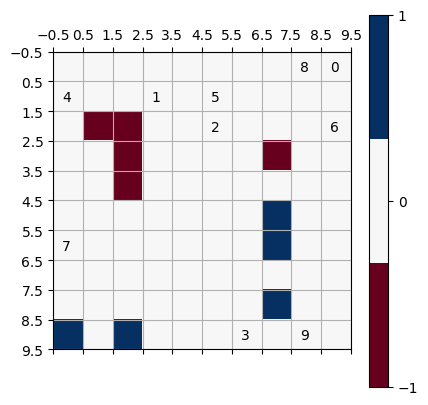

Enter move you would like to play:  9


[11 17  1 -2 41]


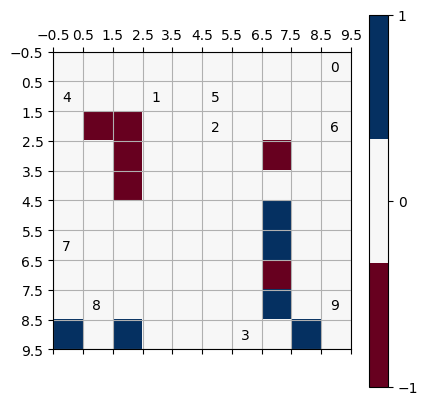

Enter move you would like to play:  3


[11 15  1 -2 41]


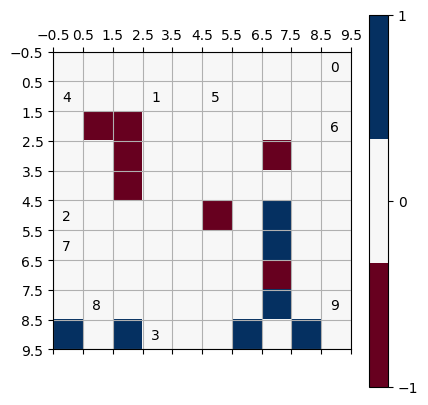

Enter move you would like to play:  3


[11 -2  1 -2 41]


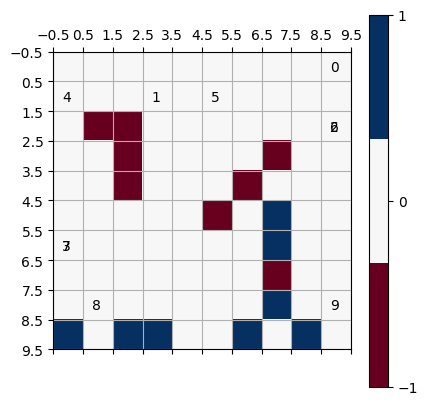

Enter move you would like to play:  7


[11 -2  1  5 41]


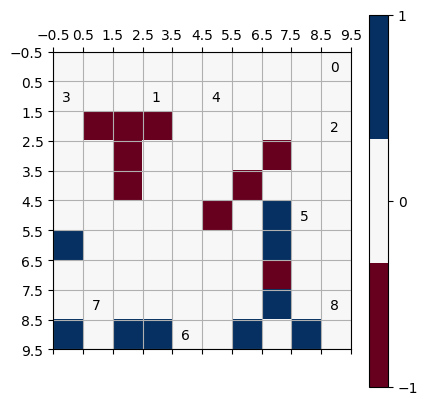

Enter move you would like to play:  6


[11 -2  1 10 41]


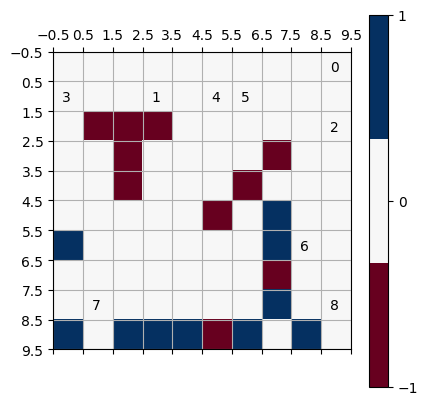

Enter move you would like to play:  6


[11 -2  1 29 41]


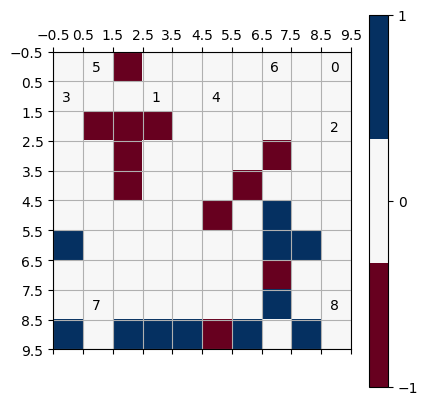

Enter move you would like to play:  3


[11 -2 36 29 41]


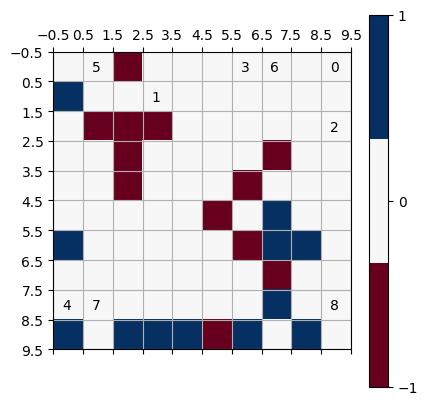

Enter move you would like to play:  4


[11 -2 49 29 41]


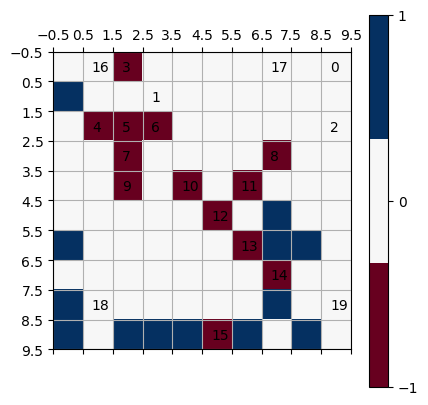

Enter move you would like to play:  5


[11 -2 47 29 41]


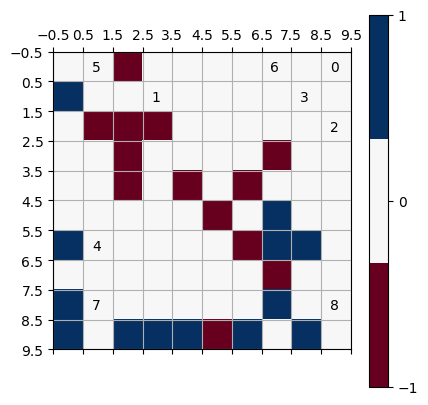

Enter move you would like to play:  4


[11 -2 33 29 41]


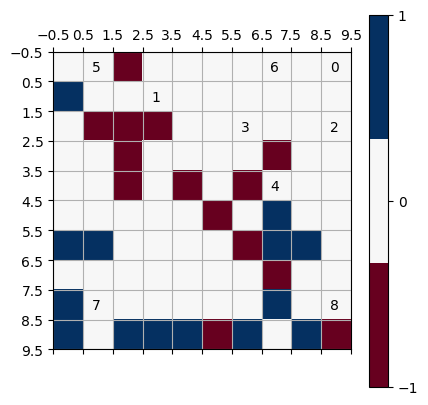

Enter move you would like to play:  7


[11 -2 33 29 30]


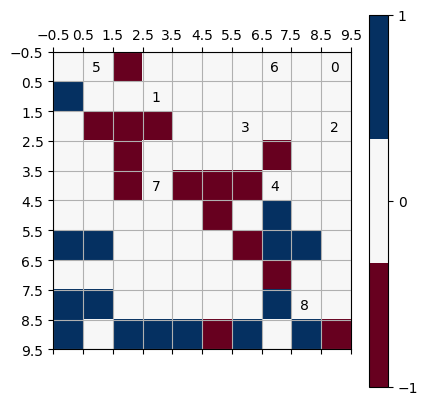

Enter move you would like to play:  7


[11 -2 33 29  2]


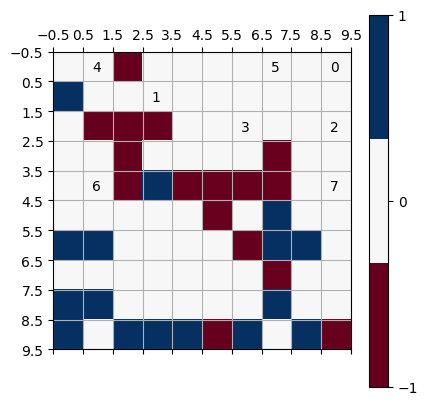

Enter move you would like to play:  6


[11 -2 33 29 25]


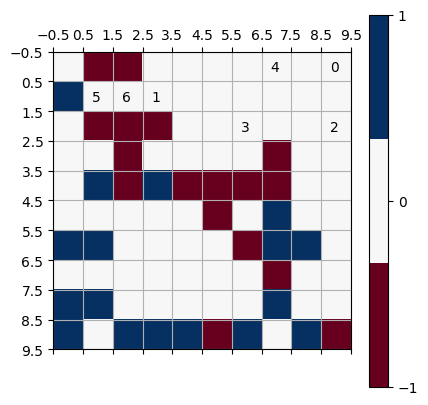

Enter move you would like to play:  6


[11 -2 33 29 41]


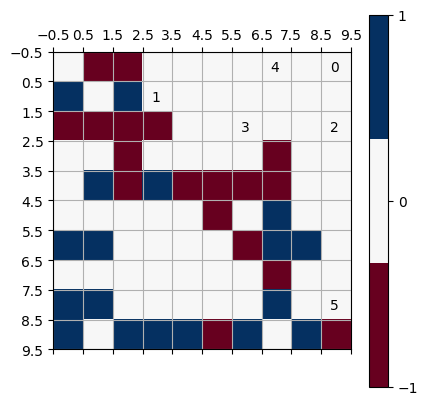

Enter move you would like to play:  1


[21 -2 33 29 41]


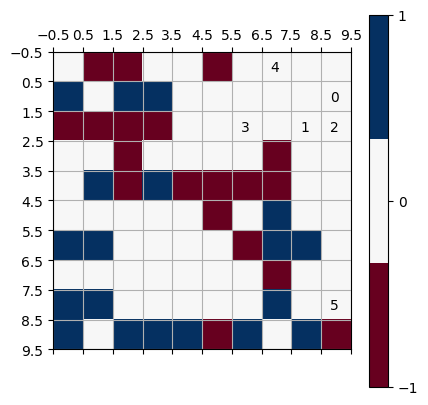

Enter move you would like to play:  1


[42 -2 33 29 41]


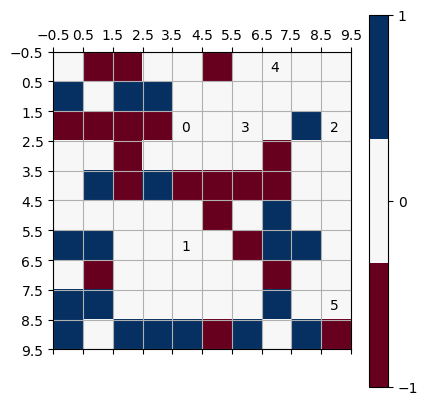

Enter move you would like to play:  0


[ 4 -2 33 29 41]


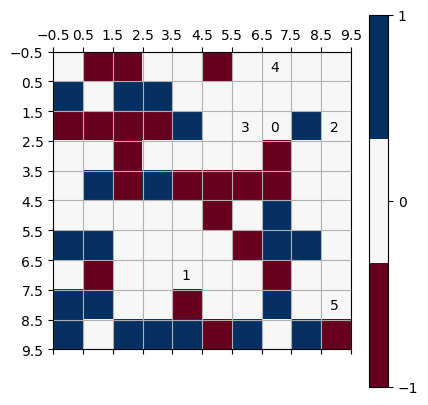

Enter move you would like to play:  0


[42 -2 33 29 41]


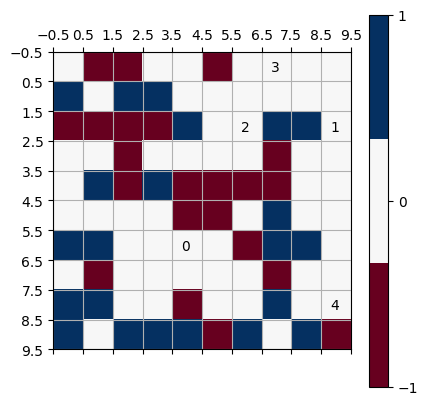

Enter move you would like to play:  2


[42 -2 45 29 41]


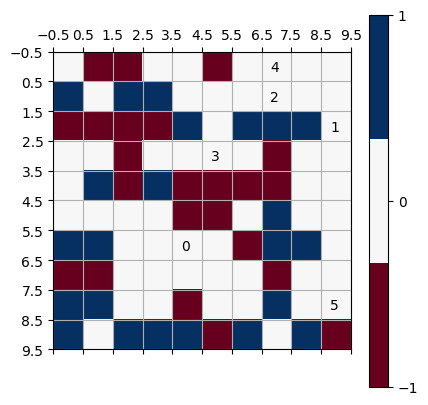

Enter move you would like to play:  0


[48 -2 45 29 41]


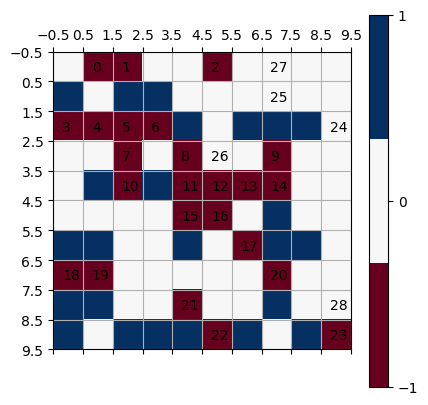

Enter move you would like to play:  11


[34 -2 45 29 41]


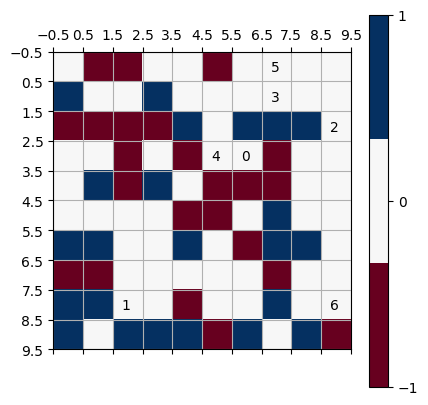

Enter move you would like to play:  3


[34 -2  8 29 41]


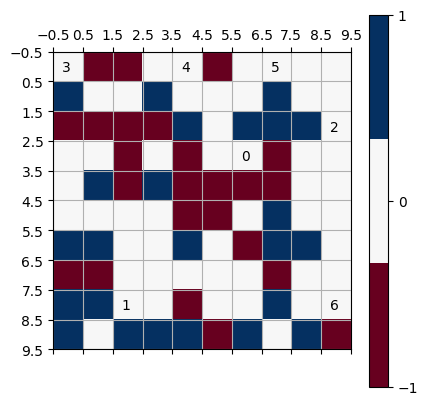

Enter move you would like to play:  4


[34 -2 39 29 41]


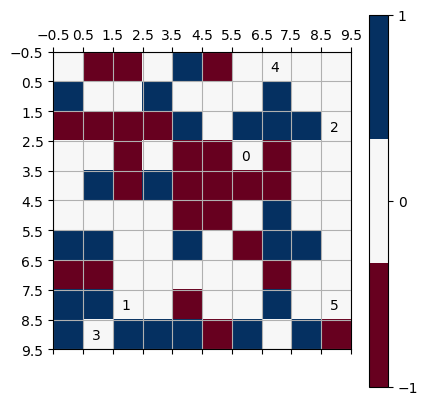

Enter move you would like to play:  3


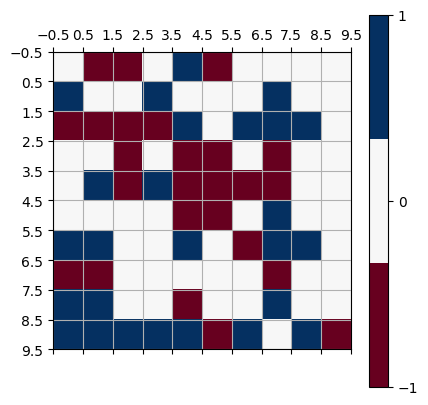

1

In [7]:
r = comp_players(user_play,Q_play,show_board=True)
if r == 1:
    print("You win!")
elif r==-1:
    print("AI wins! Do you need to the AI to go easier on you?")
else:
    print("Tie")